In [1]:
import pandas as pd
training_loss_all = pd.read_json ('saved_0624/saved_losses/training_loss_all.json', orient='index')
val_loss_all = pd.read_json ('saved_0624/saved_losses/val_loss_all.json', orient='index')
training_loss_all.columns = ['loss']
val_loss_all.columns = ['loss']

In [2]:
import re
training_loss_all['epoch'] = [re.search("Epoch +(\d+) +Step +(\d+)",x).group(1) for x in list(training_loss_all.index.values)]
# training_loss_all['step'] = [re.search("Epoch +(\d+) +Step +(\d+)",x).group(2) for x in list(training_loss_all.index.values)]
val_loss_all['epoch'] = [re.search("Epoch +(\d+) +Step +(\d+)",x).group(1) for x in list(val_loss_all.index.values)]
# val_loss_all['step'] = [re.search("Epoch +(\d+) +Step +(\d+)",x).group(2) for x in list(val_loss_all.index.values)]
training_loss_all['step'] = training_loss_all.reset_index().index
val_loss_all['step'] = val_loss_all.reset_index().index

In [3]:
import numpy as np
training_loss_all['log_loss'] = np.log(training_loss_all.loss)
val_loss_all['log_loss'] = np.log(val_loss_all.loss)
val_loss_all

,loss,epoch,step,log_loss
Epoch 0 Step 0,2.841239,0,0,1.044240
Epoch 0 Step 10,2.869200,0,1,1.054033
Epoch 0 Step 20,2.904711,0,2,1.066334
Epoch 0 Step 30,2.884592,0,3,1.059383
Epoch 0 Step 40,2.882336,0,4,1.058601
...,...,...,...,...
Epoch 39 Step 230,2.872040,39,1115,1.055023
Epoch 39 Step 240,2.828807,39,1116,1.039855
Epoch 39 Step 250,2.855427,39,1117,1.049221
Epoch 39 Step 260,2.881874,39,1118,1.058441


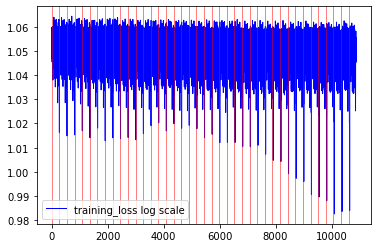

In [18]:
import matplotlib.pyplot as plt
import matplotlib.collections as collections
plt.plot(training_loss_all.step, training_loss_all.log_loss, color='blue', label="training_loss log scale", linewidth=1)
add_v_lines = list(training_loss_all.drop_duplicates(subset='epoch', keep="first").step.values)
for i, vline in enumerate(add_v_lines):
    plt.axvline(x=vline, color='red', linewidth=0.5)
plt.legend(loc='best')
plt.show()

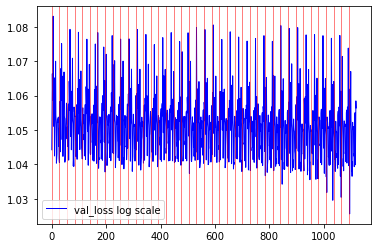

In [17]:
plt.plot(val_loss_all.step, val_loss_all.log_loss, color='blue', label="val_loss log scale", linewidth=1)
add_v_lines = list(val_loss_all.drop_duplicates(subset='epoch', keep="first").step.values)
for i, vline in enumerate(add_v_lines):
    plt.axvline(x=vline, color='red', linewidth=0.5)
plt.legend(loc='best')
plt.show()